In [38]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model


import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Density'>

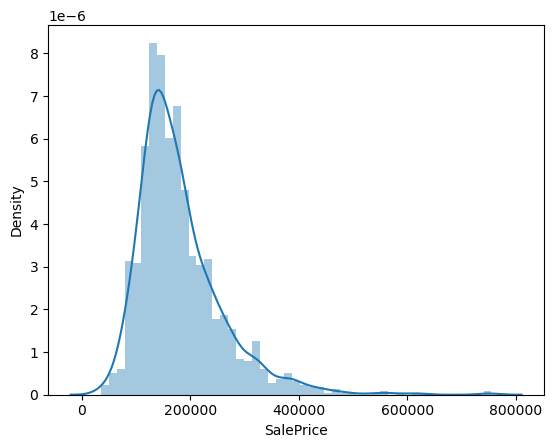

In [41]:
sns.distplot(data['SalePrice'])

In [42]:
numerical_features = data.dtypes[(data.dtypes == 'int64') | (data.dtypes == float)] #numerical values are either type int or float
numerical_features = list(numerical_features.index)
categorical_features = data.dtypes[data.dtypes == object] #categorical values are type object
categorical_features = list(categorical_features.index)

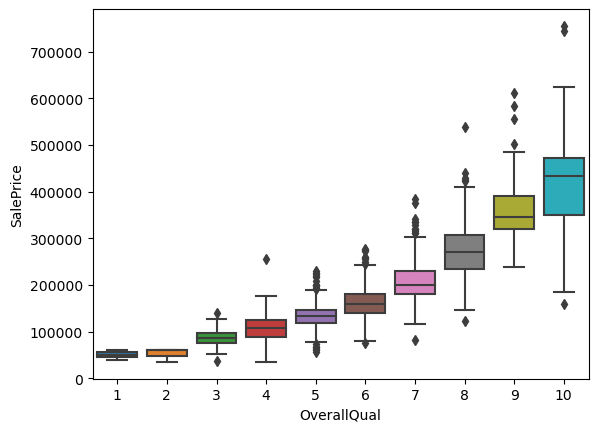

In [43]:
sns.boxplot(x="OverallQual", y="SalePrice", data=pd.concat([data['SalePrice'], data['OverallQual']], axis=1))
plt.show()

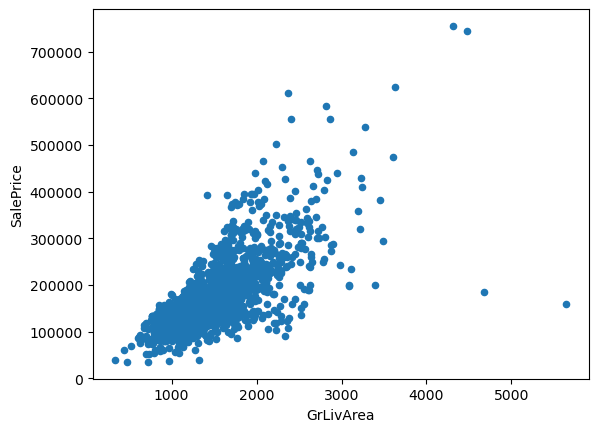

In [44]:
pd.concat([data['SalePrice'], data['GrLivArea']], axis=1).plot.scatter(x='GrLivArea', y='SalePrice');

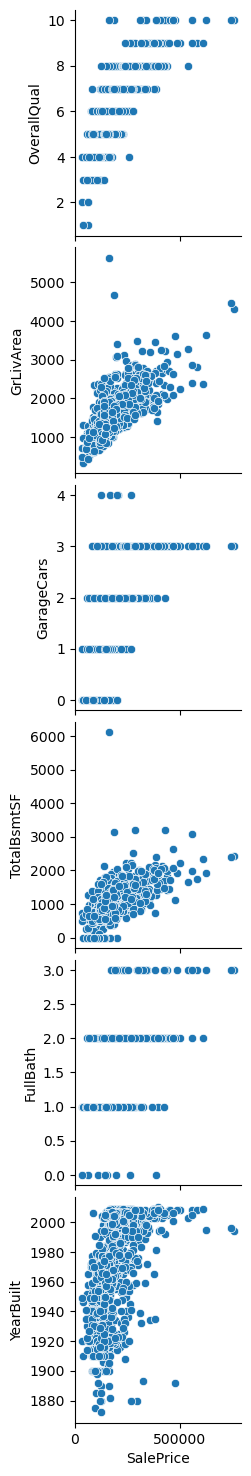

In [45]:
sns.pairplot(data, x_vars=['SalePrice'], y_vars=
            ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'])
plt.show();

## Missing data

In [46]:
data.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [47]:
# For the following features having null means that feature is missing. So replacing it with static string
features_with_null = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for feature in features_with_null:
    data[feature].fillna("NA", inplace=True)

In [48]:
data.isnull().sum().sort_values(ascending=False).head(25)

LotFrontage     259
GarageYrBlt      81
MasVnrType        8
MasVnrArea        8
Electrical        1
KitchenQual       0
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
Id                0
GarageFinish      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
KitchenAbvGr      0
GarageCars        0
GarageArea        0
PoolQC            0
dtype: int64

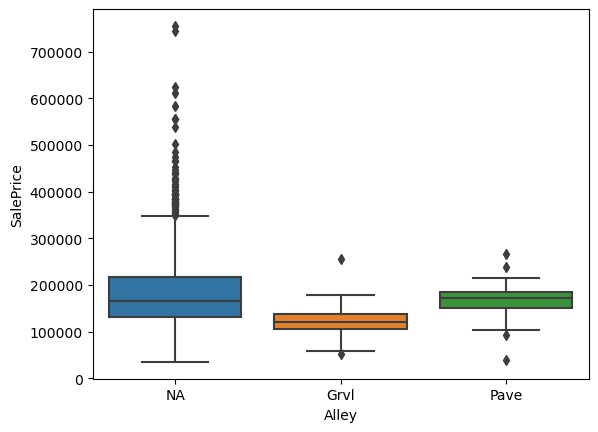

In [49]:
sns.boxplot(x="Alley", y="SalePrice", data=pd.concat([data['SalePrice'], data['Alley']], axis=1))
plt.show()

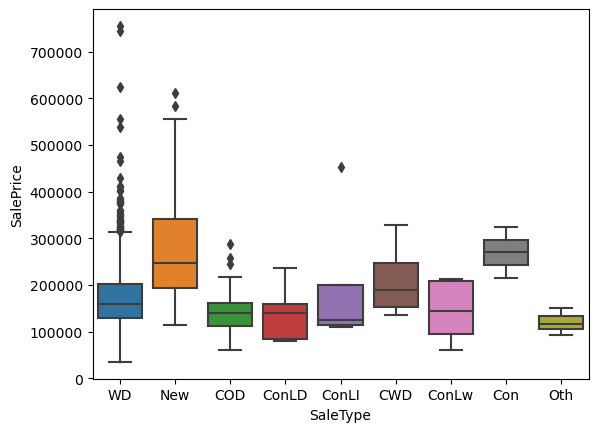

In [50]:
sns.boxplot(x="SaleType", y="SalePrice", data=pd.concat([data['SalePrice'], data['SaleType']], axis=1))
plt.show()

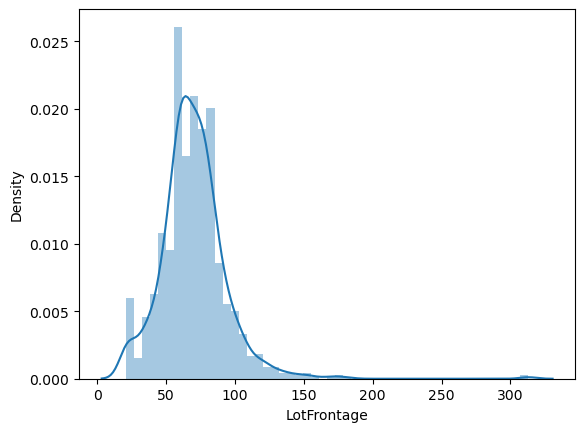

0.3517990965706781


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [51]:
sns.distplot(data['LotFrontage'])
plt.show()
print(data.LotFrontage.corr(data.SalePrice))
data.LotFrontage.describe()

In [52]:
# there are 259 null values, adding the median wouldn't be right. And, the correlation with the dependant variable isn't too high either.
if 'LotFrontage' in data.columns:
    data.drop("LotFrontage", axis=1, inplace=True)

In [53]:
# Replacing the rest of missing values with medians
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["MasVnrType"].fillna("NA", inplace=True)


In [54]:
data.isnull().sum().sort_values(ascending=False).head(5)


Electrical     1
MSSubClass     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
dtype: int64

In [55]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [56]:
for column in categorical_features:
    feature_values = list(set(data[column]))
    feature_map = {v:feature_values.index(v) for v in feature_values}
    data[column] = data[column].map(feature_map)
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,8450,0,1,3,3,1,0,...,0,2,3,4,0,2,2008,2,1,208500
1,2,20,2,9600,0,1,3,3,1,4,...,0,2,3,4,0,5,2007,2,1,181500
2,3,60,2,11250,0,1,1,3,1,0,...,0,2,3,4,0,9,2008,2,1,223500
3,4,70,2,9550,0,1,1,3,1,1,...,0,2,3,4,0,2,2006,2,0,140000
4,5,60,2,14260,0,1,1,3,1,4,...,0,2,3,4,0,12,2008,2,1,250000


<Axes: xlabel='SalePrice', ylabel='Density'>

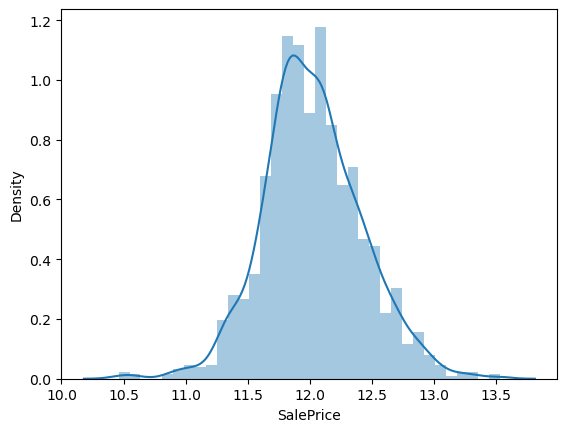

In [57]:
sns.distplot(np.log(data["SalePrice"]))

In [58]:
data["TransformedPrice"] = np.log(data["SalePrice"])

In [75]:
X = data.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y = data["TransformedPrice"].values
columns = list(data.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).columns)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=999)

In [77]:
# Scaling the data between 0 and 1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Build the Linear Regression Model

In [78]:
#Unregularized Model
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8705308947103848
Testing R2
0.8973658791186216


In [79]:
def compare_ys(lr, X_train, y_train):
    y_train_pred = lr.predict(X_train)
    # Plot the scatter of the predicted terms
    fig = plt.figure()
    sns.scatterplot(x=y_train_pred, y=y_train)
    plt.xlabel('predicted')     # X-label
    plt.show()

def residual_analysis(lr, X_train, y_train):
    y_train_pred = lr.predict(X_train)
    # Plot the histogram of the error terms
    fig = plt.figure()
    sns.displot((y_train - y_train_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 18)     # X-label
    plt.show()
    

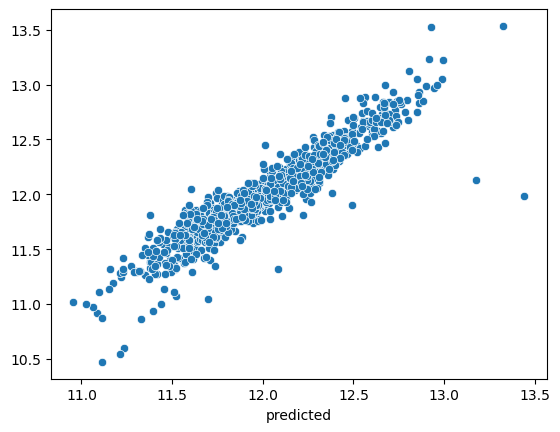

<Figure size 640x480 with 0 Axes>

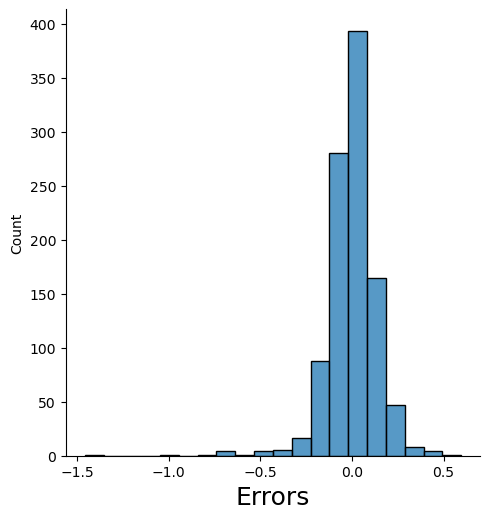

In [80]:
compare_ys(lr, X_train, y_train)
residual_analysis(lr, X_train, y_train)

In [83]:
coefs = {c:b for c,b in zip(columns, list(lr.coef_))}
sorted(coefs.items(), key=lambda x: x[1], reverse=True)[:5]

[('OverallQual', 0.7701222308540842),
 ('GrLivArea', 0.7225618880693235),
 ('OverallCond', 0.2855597481254335),
 ('GarageCars', 0.2632961163813282),
 ('TotRmsAbvGrd', 0.1695988496879938)]

In [81]:
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
lr = Lasso(alpha=0.00075)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8593990674019243
Testing R2
0.9017550071655466


In [82]:
coefs = {c:b for c,b in zip(columns, list(lr.coef_))}
sorted(coefs.items(), key=lambda x: x[1], reverse=True)[:5]

[('OverallQual', 0.7701222308540842),
 ('GrLivArea', 0.7225618880693235),
 ('OverallCond', 0.2855597481254335),
 ('GarageCars', 0.2632961163813282),
 ('TotRmsAbvGrd', 0.1695988496879938)]

In [ ]:
compare_ys(lr, X_train, y_train)
residual_analysis(lr, X_train, y_train)

In [ ]:
params = {'alpha': np.linspace(0, 0.002 , num = 100) }
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
lr = Ridge(alpha=0.001)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))


In [ ]:
compare_ys(lr, X_train, y_train)
residual_analysis(lr, X_train, y_train)

In [ ]:
params = {'alpha': np.linspace(0, 0.00001, num = 100) }

# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### 